In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_fscore_support

In [3]:
def plot_vimp(poss, X, Y, feature_names):
    
    from    sklearn.tree            import  DecisionTreeClassifier
    from    sklearn.ensemble        import  RandomForestClassifier        
    from    sklearn.ensemble        import  AdaBoostClassifier
    from    xgboost                 import  XGBClassifier  
    
    tex     =  " (Normalized) total reduction of the criterion brought by that feature."
        
    if poss == 0:
        name   =   "Decision Tree"
        clf    =   DecisionTreeClassifier(criterion="entropy", max_depth = 4, min_impurity_decrease = 0)
        clf.fit(X, Y)
    elif poss == 1:
        name   =   "Random Forest"        
        clf    =   RandomForestClassifier()
        clf.fit(X, Y)  
    elif poss == 2:
        name   =   "GradientBoost"             
        clf    =   GradientBoostingClassifier()
        clf.fit(X, Y)          
    elif poss == 3:
        name   =   "AdaBoost"        
        clf    =   AdaBoostClassifier()
        clf.fit(X, Y)
    elif poss==4:
        name  =     "XGBoost"
        clf   =      XGBClassifier()
        clf.fit(X, Y)
        
    ###
    ### Variable importance Plot
    ###
    importances =  clf.feature_importances_
    indices     =  np.argsort(importances)
    titlex      =  'Feature Importances for '+ name
    plt.title(titlex)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance :\n' + tex)
    plt.show

In [4]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
feature_names         =  ['Gender', 'Customer Type', 'Type of Travel', 'Class','Inflight wifi service',\
                          'Departure/Arrival time convenient','Ease of Online booking', 'Online boarding',\
                          'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling',\
                          'Checkin service', 'Cleanliness', 'Inflight service']

In [6]:
trn=pd.read_csv('train_16_cols.csv')
trn

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,1.0,0.0,1.0,1.0,3.0,5.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,5.0,0.0
1,1.0,1.0,0.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,0.0,2.0,3.0,1.0,0.0
2,0.0,0.0,0.0,0.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,4.0,0.0
3,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,3.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,2.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,1.0,1.0,0.0,1.0,1.0,5.0,1.0,1.0,3.0,5.0,1.0,2.0,4.0,4.0,3.0,0.0
97406,0.0,0.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,0.0
97407,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,5.0,5.0,4.0,3.0,3.0,5.0,1.0
97408,0.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,3.0,4.0,0.0


In [7]:
tst=pd.read_csv('test_16_cols.csv')
tst

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service,satisfaction
0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,1.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,3.0,0.0
2,1.0,1.0,0.0,1.0,2.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,5.0,0.0
3,1.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
4,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0.0,0.0,1.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,0.0,5.0,4.0,1.0,0.0
32466,1.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,4.0,5.0,4.0,0.0
32467,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0,0.0
32468,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0,1.0


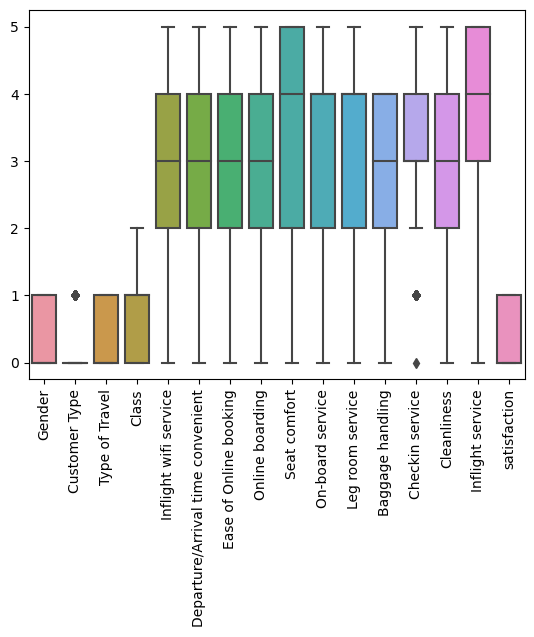

In [8]:
sns.boxplot(data=trn)
plt.xticks(rotation=90)
plt.show()

In [9]:
num=trn.select_dtypes(include=np.number)
cat=trn.select_dtypes(exclude=np.number)

In [10]:
x=trn.drop('satisfaction',axis=1)
y=trn['satisfaction']


In [11]:
ytrain=trn['satisfaction']

In [12]:
xtest=tst.drop('satisfaction',axis=1)
ytest=tst['satisfaction']

In [13]:
xtrain=x

In [14]:
xtest

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Seat comfort,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Inflight service
0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0
1,1.0,1.0,0.0,1.0,2.0,2.0,2.0,4.0,4.0,1.0,3.0,2.0,4.0,4.0,3.0
2,1.0,1.0,0.0,1.0,2.0,4.0,2.0,2.0,3.0,5.0,1.0,2.0,2.0,3.0,5.0
3,1.0,0.0,0.0,0.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,1.0,3.0
4,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32465,0.0,0.0,1.0,1.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,0.0,5.0,4.0,1.0
32466,1.0,1.0,0.0,0.0,2.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,4.0,5.0,4.0
32467,1.0,0.0,1.0,0.0,2.0,4.0,2.0,2.0,3.0,5.0,5.0,3.0,4.0,3.0,4.0
32468,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,2.0,5.0,2.0


In [15]:
def per_measures(model,test,pred):
    accuracy=accuracy_score(test,pred)
    f1score=f1_score(test,pred)
    recall=recall_score(test,pred)
    precision=precision_score(test,pred)
    weighted_f1score=f1_score(test, pred,average='weighted')
    return(accuracy,recall,precision,f1score,weighted_f1score)

In [16]:
def update_performance (name, model,test,pred):
    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'            : name,
                                    'Accuracy'         : per_measures(model,test,pred)[0],
                                    'Recall'           : per_measures(model,test,pred)[1],
                                    'Precision'        : per_measures(model,test,pred)[2],
                                    'F1 Score'         : per_measures(model,test,pred)[3],
                                    'Weighted Avg F1 Score': per_measures(model,test,pred)[4]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [17]:
def update_performances_train (name, model,train,pred):
    # assign 'comp_perf' as global variable
    global perf_score_training

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score_training = perf_score_training.append({'Model'       : name,
                                    'Accuracy'                      : per_measures(model,train,pred)[0],
                                    'Recall'                        : per_measures(model,train,pred)[1],
                                    'Precision'                     : per_measures(model,train,pred)[2],
                                    'F1 Score'                      : per_measures(model,train,pred)[3],
                                    'Weighted Avg F1 Score'         : per_measures(model,train,pred)[4]       
                                    # 'AIC'         : per_measures(model,ytest,ypred)[5],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[6]

                                     },
                                   ignore_index=True)

In [18]:
perf_score=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

In [19]:
perf_score_training=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1 Score','Weighted Avg F1 Score'])

## Logistic Regression

In [55]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

[[16558  1771]
 [ 2334 11807]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [56]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [57]:
predicted_xtrain_lr=lr.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_lr))
print(measure_train)


Training data
[[49741  5382]
 [ 6964 35323]]
f1_score:  0.8512386736070947
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410



In [166]:
print('\nTraining Data ')
update_performances_train(name='LogisticReg-Base_train',
                  model=lr,
                  train=ytrain,
                  pred=predicted_xtrain_lr)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.86778,0.851239,0.872946


In [167]:
print('\nTesting Data')
update_performance(name='LogisticReg-Base',
                  model=lr,
                  test=ytest,
                  pred=ypred_lr)
perf_score


Testing Data


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248


## K nearest neighbour Model 

In [58]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     18329
         1.0       0.94      0.90      0.92     14141

    accuracy                           0.93     32470
   macro avg       0.94      0.93      0.93     32470
weighted avg       0.94      0.93      0.93     32470



In [59]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [60]:
predicted_xtrain_knn=knn.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print(measure_train)


Training data
[[53657  1466]
 [ 2988 39299]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     55123
         1.0       0.96      0.93      0.95     42287

    accuracy                           0.95     97410
   macro avg       0.96      0.95      0.95     97410
weighted avg       0.95      0.95      0.95     97410



In [170]:
print('\nTraining Data ')
update_performances_train(name='KNeighborsClassifier',
                  model=knn,
                  train=ytrain,
                  pred=predicted_xtrain_knn)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168


In [171]:
print('\nTesting Data ')
update_performance(name='KNeighborsClassifier',
                  model=knn,
                  test=ytest,
                  pred=ypred_knn)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798


## Gaussian Naive Bayes Model

In [109]:
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb=gnb_model.predict(xtest)
print(classification_report(ytest,ypred_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     18329
         1.0       0.88      0.82      0.85     14141

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470



In [110]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [111]:
predicted_xtrain_gnb=gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410



In [174]:
print('\nTraining Data ')
update_performances_train(name='Gaussian Naive Bayes',
                  model=gnb,
                  train=ytrain,
                  pred=predicted_xtrain_gnb)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513


In [175]:
print('\nTesting Data ')
update_performance(name='Gaussian Naive Bayes',
                  model=gnb,
                  test=ytest,
                  pred=ypred_gnb)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519


## Bernoulli Naive Bayes Model

In [176]:
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain,ytrain)
ypred_bnb=bnb_model.predict(xtest)
print(classification_report(ytest,ypred_bnb))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     18329
         1.0       0.73      0.79      0.76     14141

    accuracy                           0.78     32470
   macro avg       0.78      0.78      0.78     32470
weighted avg       0.78      0.78      0.78     32470



In [177]:
predicted_xtrain_bnb=bnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bnb))
print(measure_train)


Training data
[[42598 12525]
 [ 9113 33174]]
f1_score:  0.7540745118541585
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80     55123
         1.0       0.73      0.78      0.75     42287

    accuracy                           0.78     97410
   macro avg       0.77      0.78      0.78     97410
weighted avg       0.78      0.78      0.78     97410



In [178]:
print('\nTraining Data ')
update_performances_train(name='Bernoulli Naive Bayes',
                  model=bnb,
                  train=ytrain,
                  pred=predicted_xtrain_bnb)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627


In [179]:
print('\nTesting Data ')
update_performance(name='Bernoulli Naive Bayes',
                  model=bnb,
                  test=ytest,
                  pred=ypred_bnb)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584


## Decision Tree

In [52]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(xtrain,ytrain)
ypred_dt=dt_model.predict(xtest)
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

[[17464   865]
 [  904 13237]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     18329
         1.0       0.94      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.95      0.95      0.95     32470



In [53]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [54]:
predicted_xtrain_dt=dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)


Training data
[[55104    19]
 [  291 41996]]
f1_score:  0.9963227444188749
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



In [182]:
print('\nTraining Data ')
update_performances_train(name='Decision Tress ',
                  model=dt,
                  train=ytrain,
                  pred=predicted_xtrain_dt)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816


In [183]:
print('\nTesting Data ')
update_performance(name='Decision Tress ',
                  model=dt,
                  test=ytest,
                  pred=ypred_dt)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249


## Tuned Decision Tree 

In [184]:
turned_parameters=[{"criterion":["entropy","gini"],
                   "max_depth":[3,5,6,7,9,10,15]}]

In [185]:
dt2=DecisionTreeClassifier(random_state=10)
tree_grid=GridSearchCV(estimator=dt2,
                      param_grid=turned_parameters,
                      cv=5)

In [186]:
tree_grid_model=tree_grid.fit(xtrain,ytrain)
tree_grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [187]:
ypred_dt2=tree_grid_model.predict(xtest)
print(classification_report(ytest,ypred_dt2))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [188]:
predicted_xtrain_dt2=tree_grid_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt2)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt2)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt2))
print(measure_train)


Training data
[[53750  1373]
 [ 2088 40199]]
f1_score:  0.9587283416210545
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.95      0.96     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



In [189]:
print('\nTraining Data ')
update_performances_train(name='Tuned Decision Tress ',
                  model=dt2,
                  train=ytrain,
                  pred=predicted_xtrain_dt2)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433


In [190]:
print('\nTesting Data ')
update_performance(name='Tuned Decision Tress ',
                  model=dt2,
                  test=ytest,
                  pred=ypred_dt2)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158


## Random Forest Model 

In [65]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [66]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[55012   111]
 [  200 42087]]
f1_score:  0.9963188731727525
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



In [193]:
print('\nTraining Data ')
update_performances_train(name='Random Forest ',
                  model=rf,
                  train=ytrain,
                  pred=predicted_xtrain_rf)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817


In [194]:
print('\nTesting Data ')
update_performance(name='Random Forest',
                  model=rf,
                  test=ytest,
                  pred=ypred_rf)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818


## Tuned Random Forest

In [195]:
params={'n_estimators': [10,15,20,25,30],
        'max_features': ['sqrt','log2'],
       'max_depth': [5,6,7]}

rf1=RandomForestClassifier(random_state=10)
rf1_cv=GridSearchCV(rf1,param_grid=params,cv=5,scoring='f1_macro')
rf1_cv.fit(xtrain,ytrain)
rf1_cv.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 30}

In [196]:
rfnew=RandomForestClassifier(**rf1_cv.best_params_,random_state=10)
rfnew.fit(xtrain,ytrain)
ypred_rfnew=rfnew.predict(xtest)
f1_score(ytest,ypred_rfnew)
print(classification_report(ytest,ypred_rfnew))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     18329
         1.0       0.93      0.92      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [197]:
predicted_xtrain_rfnew=rfnew.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfnew)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfnew)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfnew))
print(measure_train)


Training data
[[52318  2805]
 [ 3410 38877]]
f1_score:  0.9259845895509057
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     55123
         1.0       0.93      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.93      0.93     97410
weighted avg       0.94      0.94      0.94     97410



In [198]:
print('\nTraining Data ')
update_performances_train(name='Random Forest after finding best param',
                  model=rfnew,
                  train=ytrain,
                  pred=predicted_xtrain_rfnew)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142


In [199]:
print('\nTesting Data ')
update_performance(name='Random Forest after finding best param',
                  model=rfnew,
                  test=ytest,
                  pred=ypred_rfnew)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055


## Random Forest with Out of Bag

In [200]:
rfoob=RandomForestClassifier(**rf1_cv.best_params_,oob_score=True,random_state=10)
rfoob.fit(xtrain,ytrain)
ypred_rfoob=rfoob.predict(xtest)
f1_score(ytest,ypred_rfoob)
print(classification_report(ytest,ypred_rfoob))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     18329
         1.0       0.93      0.92      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [201]:
predicted_xtrain_rfoob=rfoob.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rfoob)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rfoob)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rfoob))
print(measure_train)


Training data
[[52318  2805]
 [ 3410 38877]]
f1_score:  0.9259845895509057
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     55123
         1.0       0.93      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.93      0.93     97410
weighted avg       0.94      0.94      0.94     97410



In [202]:
print('\nTraining Data ')
update_performances_train(name='Random Forest with out of bag',
                  model=rfoob,
                  train=ytrain,
                  pred=predicted_xtrain_rfoob)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142
8,Random Forest with out of bag,0.936198,0.919361,0.932705,0.925985,0.936142


In [203]:
print('\nTesting Data ')
update_performance(name='Random Forest with out of bag',
                  model=rfoob,
                  test=ytest,
                  pred=ypred_rfoob)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055


## Tunned Knn

In [204]:
knn=KNeighborsClassifier(n_neighbors=311)
bc_knn=BaggingClassifier(base_estimator=knn,random_state=10)
knn_model=bc_knn.fit(xtrain,ytrain)
ypred_bc_knn=knn_model.predict(xtest)
print(classification_report(ytest,ypred_bc_knn))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     18329
         1.0       0.93      0.84      0.88     14141

    accuracy                           0.90     32470
   macro avg       0.91      0.90      0.90     32470
weighted avg       0.90      0.90      0.90     32470



In [205]:
predicted_xtrain_bc_knn=knn_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_bc_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_bc_knn)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_bc_knn))
print(measure_train)


Training data
[[52333  2790]
 [ 6625 35662]]
f1_score:  0.8833896877593232
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     55123
         1.0       0.93      0.84      0.88     42287

    accuracy                           0.90     97410
   macro avg       0.91      0.90      0.90     97410
weighted avg       0.90      0.90      0.90     97410



In [206]:
print('\nTraining Data ')
update_performances_train(name='Tunned knn',
                  model=knn,
                  train=ytrain,
                  pred=predicted_xtrain_bc_knn)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142
8,Random Forest with out of bag,0.936198,0.919361,0.932705,0.925985,0.936142
9,Tunned knn,0.903347,0.843332,0.927442,0.883390,0.902676


In [207]:
print('\nTesting Data ')
update_performance(name='Tunned knn',
                  model=knn,
                  test=ytest,
                  pred=ypred_bc_knn)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055
9,Tunned knn,0.903141,0.843788,0.927261,0.883557,0.902484


## Ada Boosting 

In [24]:
ada=AdaBoostClassifier(dt,random_state=10)
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print(classification_report(ytest,ypred_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [25]:
ada.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 10}

In [26]:
predicted_xtrain_ada=ada.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)


Training data
[[55010   113]
 [  197 42090]]
f1_score:  0.996330926736892
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     55123
         1.0       1.00      1.00      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



In [210]:
print('\nTraining Data ')
update_performances_train(name='Adaboost Classifier',
                  model=ada,
                  train=ytrain,
                  pred=predicted_xtrain_ada)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142
8,Random Forest with out of bag,0.936198,0.919361,0.932705,0.925985,0.936142
9,Tunned knn,0.903347,0.843332,0.927442,0.883390,0.902676


In [211]:
print('\nTesting Data ')
update_performance(name='Adaboost Classifier',
                  model=ada,
                  test=ytest,
                  pred=ypred_ada)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055
9,Tunned knn,0.903141,0.843788,0.927261,0.883557,0.902484


## Gradient Boost Classifier 

In [61]:
gbc=GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred_gbc=gbc.predict(xtest)
print(classification_report(ytest,ypred_gbc))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     18329
         1.0       0.95      0.92      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [62]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [63]:
predicted_xtrain_gbc=gbc.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)


Training data
[[52946  2177]
 [ 3447 38840]]
f1_score:  0.9324882358590224
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     55123
         1.0       0.95      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410



In [215]:
print('\nTesting Data ')
update_performance(name='Gradient Boost Classifier',
                  model=gbc,
                  test=ytest,
                  pred=ypred_gbc)
perf_score


Testing Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055
9,Tunned knn,0.903141,0.843788,0.927261,0.883557,0.902484


## XG Boost Classifier 

In [42]:
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print(classification_report(ytest,ypred_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [43]:
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [44]:
predicted_xtrain_xg=xg.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54191   932]
 [ 2114 40173]]
f1_score:  0.9634737145049885
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [218]:
print('\nTraining Data ')
update_performances_train(name='XGBoost Classifier',
                  model=xg,
                  train=ytrain,
                  pred=predicted_xtrain_xg)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142
8,Random Forest with out of bag,0.936198,0.919361,0.932705,0.925985,0.936142
9,Tunned knn,0.903347,0.843332,0.927442,0.883390,0.902676


In [219]:
print('\nTesting Data')
update_performance(name='XGBoost Classifier',
                  model=xg,
                  test=ytest,
                  pred=ypred_xg)
perf_score


Testing Data


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055
9,Tunned knn,0.903141,0.843788,0.927261,0.883557,0.902484


## Stacking 

In [220]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
base_learner=[('lr_model', lr ),('knn_model', knn),('dt_model', dt)]
stack=StackingClassifier(estimators=base_learner, final_estimator=GaussianNB())
stack.fit(xtrain,ytrain)
ypred_stack=stack.predict(xtest)
print(classification_report(ytest,ypred_stack))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     18329
         1.0       0.93      0.94      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.94      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [221]:
predicted_xtrain_stack=stack.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_stack)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_stack)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_stack))
print(measure_train)


Training data
[[54543   580]
 [  167 42120]]
f1_score:  0.9912104204172402
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     55123
         1.0       0.99      1.00      0.99     42287

    accuracy                           0.99     97410
   macro avg       0.99      0.99      0.99     97410
weighted avg       0.99      0.99      0.99     97410



In [222]:
print('\nTraining Data ')
update_performances_train(name='Stacking',
                  model=stack,
                  train=ytrain,
                  pred=predicted_xtrain_stack)
perf_score_training


Training Data 


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base_train,0.873257,0.835316,0.867780,0.851239,0.872946
1,KNeighborsClassifier,0.954276,0.929340,0.964038,0.946371,0.954168
2,Gaussian Naive Bayes,0.876091,0.824603,0.882271,0.852463,0.875513
3,Bernoulli Naive Bayes,0.777867,0.784496,0.725924,0.754075,0.778627
4,Decision Tress,0.996818,0.993118,0.999548,0.996323,0.996816
5,Tuned Decision Tress,0.964470,0.950623,0.966973,0.958728,0.964433
6,Random Forest,0.996818,0.995389,0.997275,0.996331,0.996817
7,Random Forest after finding best param,0.936198,0.919361,0.932705,0.925985,0.936142
8,Random Forest with out of bag,0.936198,0.919361,0.932705,0.925985,0.936142
9,Tunned knn,0.903347,0.843332,0.927442,0.883390,0.902676


In [223]:
print('\nTesting Data')
update_performance(name='Stacking',
                  model=stack,
                  test=ytest,
                  pred=ypred_stack)
perf_score


Testing Data


,Model,Accuracy,Recall,Precision,F1 Score,Weighted Avg F1 Score
0,LogisticReg-Base,0.873576,0.834948,0.869568,0.851907,0.873248
1,KNeighborsClassifier,0.934986,0.903401,0.944896,0.923683,0.934798
2,Gaussian Naive Bayes,0.875115,0.822856,0.882451,0.851612,0.874519
3,Bernoulli Naive Bayes,0.778842,0.787002,0.727481,0.756072,0.779584
4,Decision Tress,0.944256,0.934800,0.937053,0.935925,0.944249
5,Tuned Decision Tress,0.950200,0.935719,0.949211,0.942417,0.950158
6,Random Forest,0.957900,0.936426,0.965864,0.950917,0.957818
7,Random Forest after finding best param,0.937111,0.920373,0.934247,0.927258,0.937055
8,Random Forest with out of bag,0.937111,0.920373,0.934247,0.927258,0.937055
9,Tunned knn,0.903141,0.843788,0.927261,0.883557,0.902484


In [84]:
# here random forest and xg boost is giving better model 

## Variable Importance plot of decision Tree

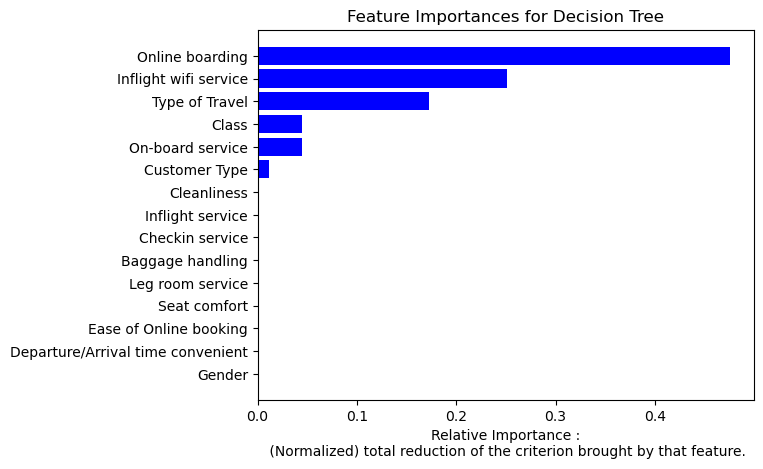

In [85]:
plot_vimp(0, x, y, feature_names)

## Variable Importance plot of Random Forest

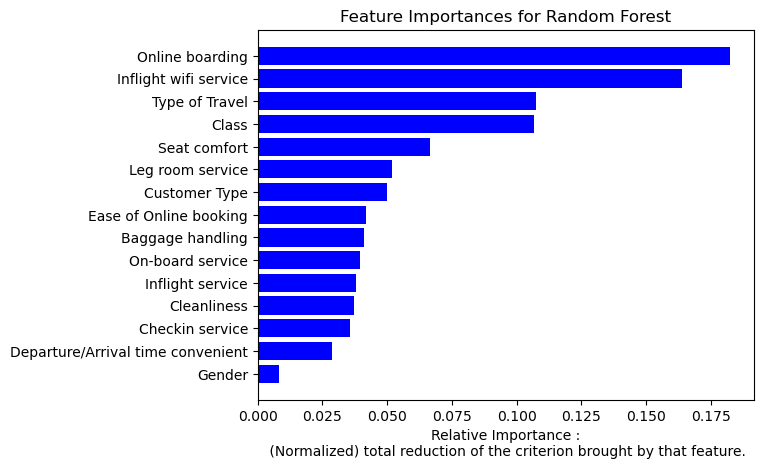

In [86]:
plot_vimp(1,x,y,feature_names)

## Variable Importance plot of GradientBoost

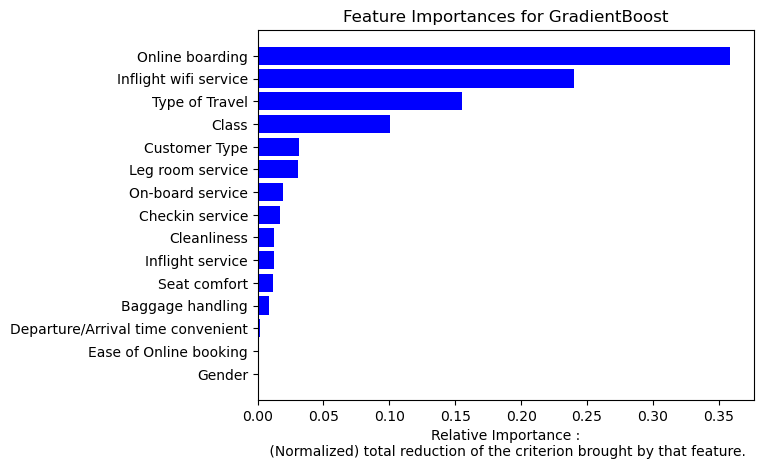

In [87]:
plot_vimp(2,x,y,feature_names)

## Variable Importance plot of AdaBoost

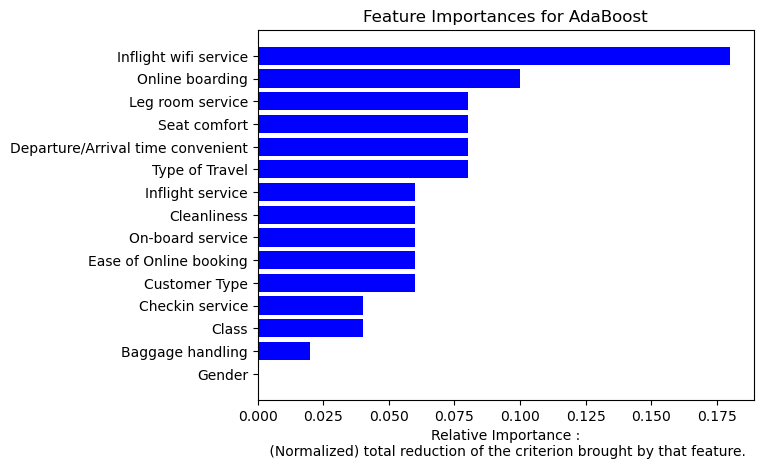

In [88]:
plot_vimp(3,x,y,feature_names)

## Variable Importance plot of XGBoost

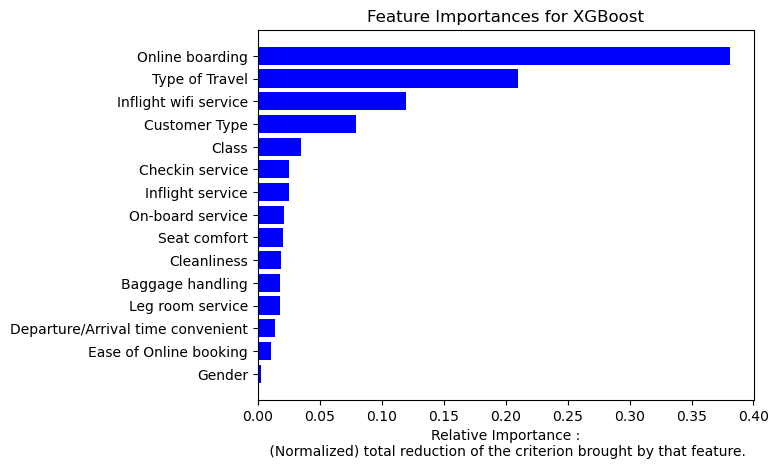

In [89]:
plot_vimp(4,x,y,feature_names)

## Confusion Matrix and ROC curve of Logistic Regression

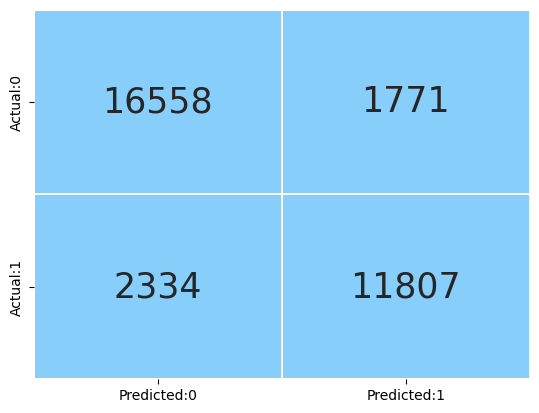

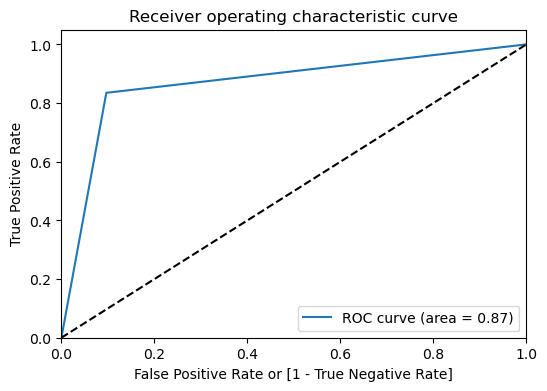

In [90]:
con_lr=confusion_matrix(ytest,ypred_lr)
conf_matrix = pd.DataFrame(data = con_lr,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_lr)

## Confusion Matrix and ROC curve of KNeighbour 

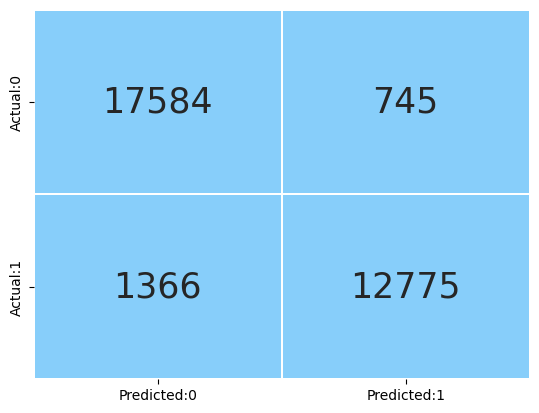

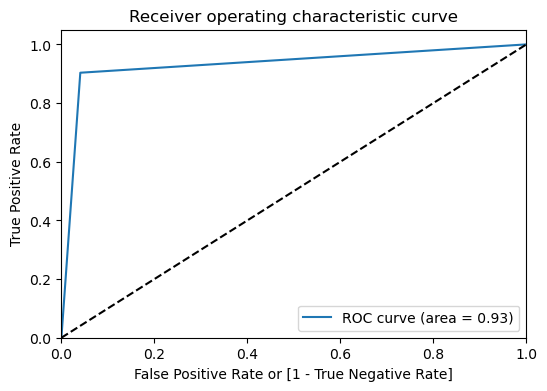

In [91]:
con_knn=confusion_matrix(ytest,ypred_knn)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_knn)

## Confusion Matrix and ROC curve of Gaussian Naive Bayes

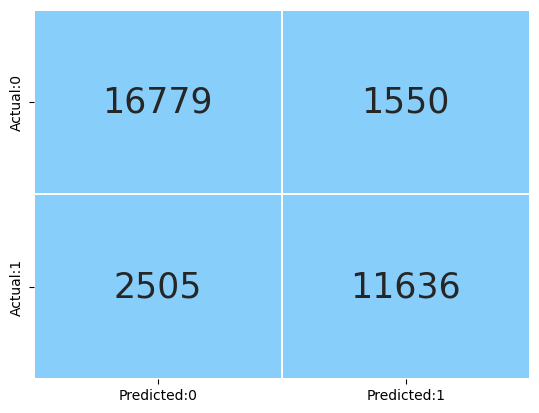

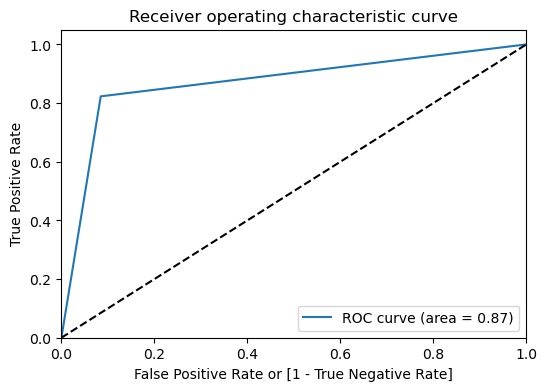

In [92]:
con_knn=confusion_matrix(ytest,ypred_gnb)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gnb)

## Confusion Matrix and ROC curve of Decision Tree

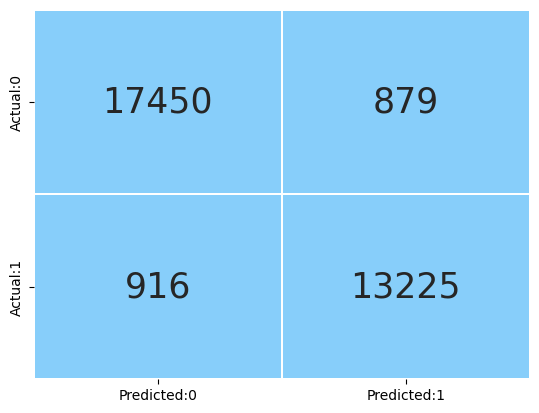

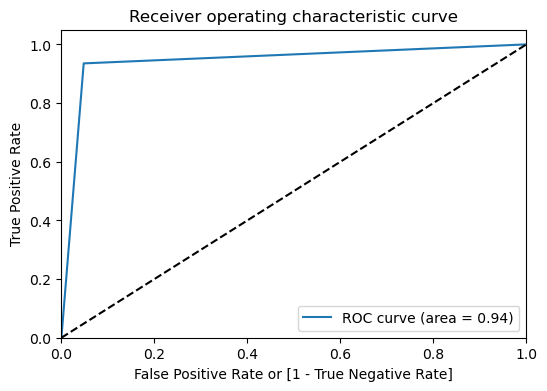

In [93]:
con_knn=confusion_matrix(ytest,ypred_dt)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_dt)

## Confusion Matrix and ROC curve of Random Forest

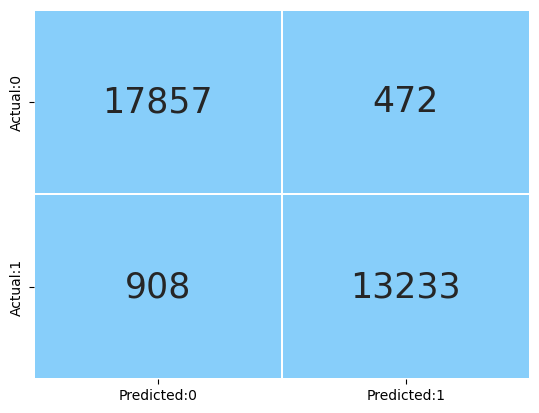

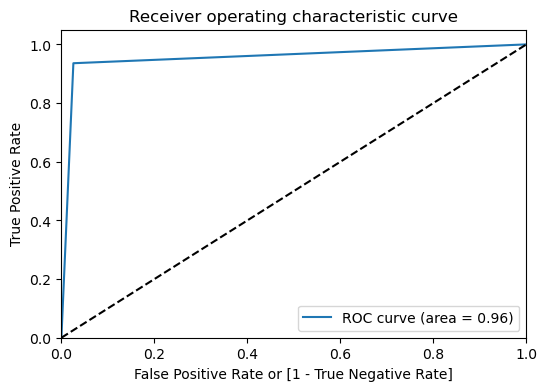

In [94]:
con_knn=confusion_matrix(ytest,ypred_rf)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_rf)

## Confusion Matrix and ROC curve of Gradient Boost

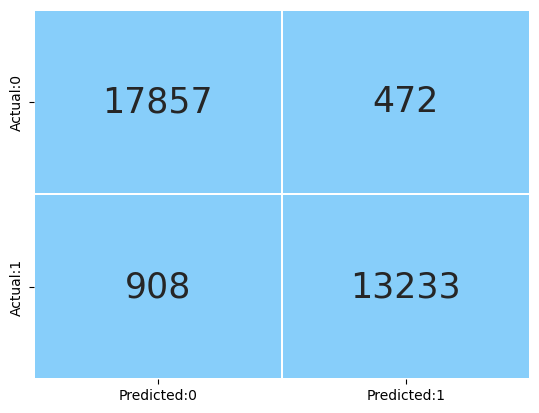

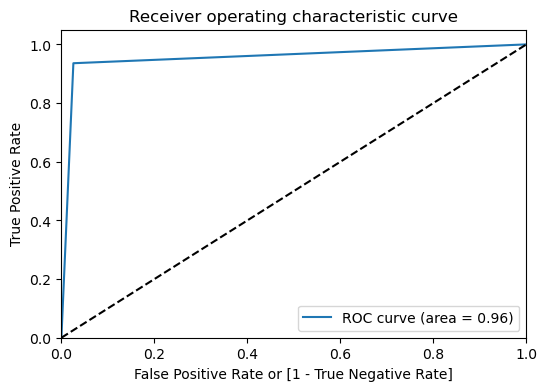

In [95]:
con_knn=confusion_matrix(ytest,ypred_gbc)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_gbc)

## Confusion Matrix and ROC curve of AdaBoost

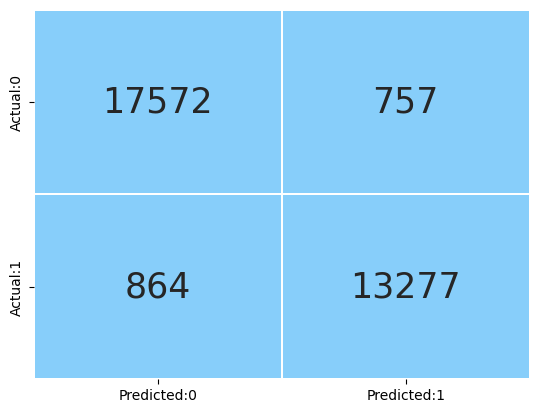

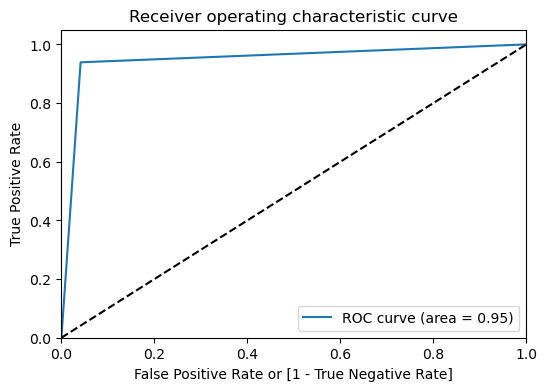

In [96]:
con_knn=confusion_matrix(ytest,ypred_ada)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_ada)

## Confusion Matrix and ROC curve of XGBoost

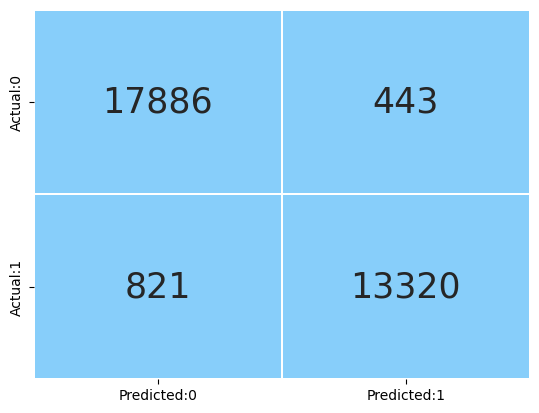

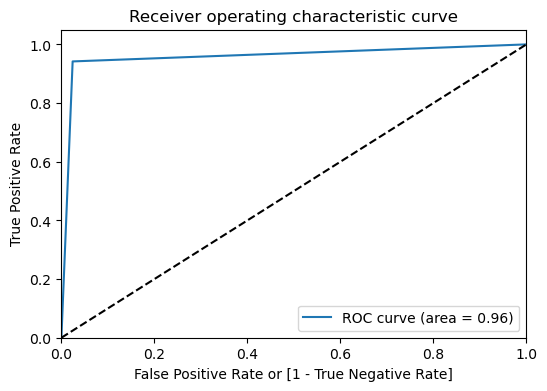

In [97]:
con_knn=confusion_matrix(ytest,ypred_xg)
conf_matrix = pd.DataFrame(data = con_knn,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 10)
# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)
# display the plot
plt.show()
draw_roc(ytest,ypred_xg)

## Tuning Random Forest by changing max_depth

In [20]:
rf=RandomForestClassifier(max_depth=8, min_samples_split=4)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     18329
         1.0       0.94      0.92      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [21]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[52522  2601]
 [ 3216 39071]]
f1_score:  0.9307161828987958
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     55123
         1.0       0.94      0.92      0.93     42287

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410



In [52]:
rf=RandomForestClassifier(max_depth=15, min_samples_split=10)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [53]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54030  1093]
 [ 2234 40053]]
f1_score:  0.9601236920642909
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.96      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [54]:
weighted_f1score = f1_score(ytest,ypred_rf,average='weighted')
weighted_f1score

0.9583194676672528

In [55]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_rf,average='weighted')
weighted_f1score

0.9657867851050065

In [56]:
rf=RandomForestClassifier(max_depth=20, min_samples_split=15)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [57]:
weighted_f1score = f1_score(ytest,ypred_rf,average='weighted')
weighted_f1score

0.9603471807439753

In [58]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54257   866]
 [ 2177 40110]]
f1_score:  0.9634531544623662
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [59]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_rf,average='weighted')
weighted_f1score

0.968698531640562

In [64]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
rf=RandomForestClassifier(max_depth=19, min_samples_split=16)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [27]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54220   903]
 [ 2230 40057]]
f1_score:  0.962365010150516
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [28]:
rf=RandomForestClassifier(max_depth=5, min_samples_split=3)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93     18329
         1.0       0.92      0.88      0.90     14141

    accuracy                           0.92     32470
   macro avg       0.92      0.91      0.91     32470
weighted avg       0.92      0.92      0.92     32470



In [29]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[52017  3106]
 [ 4999 37288]]
f1_score:  0.901972641840326
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93     55123
         1.0       0.92      0.88      0.90     42287

    accuracy                           0.92     97410
   macro avg       0.92      0.91      0.91     97410
weighted avg       0.92      0.92      0.92     97410



## Tuning XGBoost 

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Create the XGBoost model
xgb_model = XGBClassifier()

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1_macro', cv=cv)
grid_result = grid_search.fit(xtrain, ytrain)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 7}
Best Accuracy:  0.9609223694056224


In [21]:
xg=XGBClassifier(learning_rate=0.01,max_depth= 9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     18329
         1.0       0.96      0.92      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.94      0.94     32470
weighted avg       0.95      0.95      0.94     32470



In [22]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[53485  1638]
 [ 3349 38938]]
f1_score:  0.9398163233288682
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     55123
         1.0       0.96      0.92      0.94     42287

    accuracy                           0.95     97410
   macro avg       0.95      0.95      0.95     97410
weighted avg       0.95      0.95      0.95     97410



In [23]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9449731573473394

In [24]:
xg=XGBClassifier(learning_rate=0.05,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [25]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54060  1063]
 [ 2496 39791]]
f1_score:  0.9571932019100083
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.94      0.96     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



In [26]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9585512581503719

In [49]:
xg=XGBClassifier(learning_rate=0.1,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [50]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54235   888]
 [ 2133 40154]]
f1_score:  0.9637461147979697
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [51]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_xg,average='weighted')
weighted_f1score

0.9689282356948857

In [29]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.961117297373449

In [30]:
xg=XGBClassifier(learning_rate=0.2,max_depth=5)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [31]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[53977  1146]
 [ 2528 39759]]
f1_score:  0.9558370997211272
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.94      0.96     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



In [32]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9590765359006421

In [65]:
xg=XGBClassifier(learning_rate=0.2,max_depth=7)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [66]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54233   890]
 [ 2092 40195]]
f1_score:  0.964232596075421
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [67]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9611222513569149

In [68]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_xg,average='weighted')
weighted_f1score

0.9693315334258377

In [69]:
xg.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [36]:
xg=XGBClassifier(learning_rate=0.3,max_depth=8)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [37]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54540   583]
 [ 1440 40847]]
f1_score:  0.9758352544883356
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.99      0.97      0.98     42287

    accuracy                           0.98     97410
   macro avg       0.98      0.98      0.98     97410
weighted avg       0.98      0.98      0.98     97410



In [38]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.959437504636122

In [39]:
xg=XGBClassifier(learning_rate=0.2,max_depth=8)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [40]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54351   772]
 [ 1816 40471]]
f1_score:  0.9690171195977493
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.98      0.96      0.97     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [41]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9610609201189568

In [42]:
xg=XGBClassifier(learning_rate=0.2,max_depth=9)
xg_sm_model=xg.fit(xtrain,ytrain)
ypred_sm_xg=xg_sm_model.predict(xtest)
print(classification_report(ytest,ypred_sm_xg))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [43]:
predicted_xtrain_xg=xg_sm_model.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54501   622]
 [ 1542 40745]]
f1_score:  0.9741315418270495
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.98      0.96      0.97     42287

    accuracy                           0.98     97410
   macro avg       0.98      0.98      0.98     97410
weighted avg       0.98      0.98      0.98     97410



In [44]:
weighted_f1score = f1_score(ytest,ypred_sm_xg,average='weighted')
weighted_f1score

0.9606089039281568

## Tuning for logistic regression 

In [146]:
param_grid = {
    'penalty': ['l1', 'l2'],             
    'C': [0.001,0.01,0.1,1,10,100],      
    'solver': ['liblinear', 'saga'],    
    'max_iter': [100, 200, 300, 500]    
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [147]:
lr=LogisticRegression(C=0.01, max_iter= 100, penalty= 'l1', solver= 'saga')
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)
print(confusion_matrix(ytest,ypred_lr))
print(classification_report(ytest,ypred_lr))

[[16577  1752]
 [ 2340 11801]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     18329
         1.0       0.87      0.83      0.85     14141

    accuracy                           0.87     32470
   macro avg       0.87      0.87      0.87     32470
weighted avg       0.87      0.87      0.87     32470



In [148]:
weighted_f1score = f1_score(ytest,ypred_lr,average='weighted')
weighted_f1score

0.8736328707662137

In [149]:
predicted_xtrain_lr=lr.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_lr)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_lr)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_lr))
print(measure_train)


Training data
[[49782  5341]
 [ 6965 35322]]
f1_score:  0.8516455696202533
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     55123
         1.0       0.87      0.84      0.85     42287

    accuracy                           0.87     97410
   macro avg       0.87      0.87      0.87     97410
weighted avg       0.87      0.87      0.87     97410



In [150]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_lr,average='weighted')
weighted_f1score

0.873348304897435

## Tuning K neighbour Classifier 

In [76]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9,311 ,313],           
    'weights': ['uniform', 'distance'],    
    'p': [1, 2]                             
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [79]:
knn=KNeighborsClassifier(n_neighbors= 7, p= 1, weights='uniform')
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     18329
         1.0       0.95      0.91      0.93     14141

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470



In [80]:
weighted_f1score = f1_score(ytest,ypred_knn,average='weighted')
weighted_f1score

0.939792896705289

In [81]:
predicted_xtrain_knn=knn.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_knn)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_knn)
print(measure_train)


Training data
[[53640  1483]
 [ 3037 39250]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     55123
         1.0       0.96      0.93      0.95     42287

    accuracy                           0.95     97410
   macro avg       0.96      0.95      0.95     97410
weighted avg       0.95      0.95      0.95     97410



In [82]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_knn,average='weighted')
weighted_f1score

0.953486398258816

## Tuning Gaussian Naive Bayes 

In [151]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.5, 0.5]],  
    'var_smoothing': [1e-10, 1e-9, 1e-8]         
}
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-10}


In [152]:
gnb=GaussianNB(priors= None, var_smoothing= 1e-10)
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb=gnb_model.predict(xtest)
print(classification_report(ytest,ypred_gnb))

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     18329
         1.0       0.88      0.82      0.85     14141

    accuracy                           0.88     32470
   macro avg       0.88      0.87      0.87     32470
weighted avg       0.88      0.88      0.87     32470



In [153]:
weighted_f1score = f1_score(ytest,ypred_gnb,average='weighted')
weighted_f1score

0.8745187328306693

In [154]:
predicted_xtrain_gnb=gnb.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gnb)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gnb)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gnb))
print(measure_train)


Training data
[[50470  4653]
 [ 7417 34870]]
f1_score:  0.8524630240801858
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     55123
         1.0       0.88      0.82      0.85     42287

    accuracy                           0.88     97410
   macro avg       0.88      0.87      0.87     97410
weighted avg       0.88      0.88      0.88     97410



In [155]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_gnb,average='weighted')
weighted_f1score

0.8755128632081938

## Tuning Decision Tree 

In [156]:
param_grid = {
    'max_depth': [None, 5, 10, 15],                 
    'min_samples_split': [2, 5, 10],                 
    'min_samples_leaf': [1, 2, 4],                   
    'max_features': [None, 'sqrt', 'log2', 0.5]     
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [157]:
dt=DecisionTreeClassifier(max_depth= 15, max_features= 0.5, min_samples_leaf= 2, min_samples_split= 10)
dt_model=dt.fit(xtrain,ytrain)
ypred_dt=dt_model.predict(xtest)
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

[[17596   733]
 [  995 13146]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     18329
         1.0       0.95      0.93      0.94     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.94      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [158]:
weighted_f1score = f1_score(ytest,ypred_dt,average='weighted')
weighted_f1score

0.946721666463999

In [159]:
predicted_xtrain_dt=dt.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_dt)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_dt)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_dt))
print(measure_train)


Training data
[[53352  1771]
 [ 2415 39872]]
f1_score:  0.9501251042535447
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     55123
         1.0       0.96      0.94      0.95     42287

    accuracy                           0.96     97410
   macro avg       0.96      0.96      0.96     97410
weighted avg       0.96      0.96      0.96     97410



In [160]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_dt,average='weighted')
weighted_f1score

0.95698691613234

## Tuning Random Forest 

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200],                   
    'max_depth': [None, 5, 10, 15],                    
    'min_samples_split': [2, 5, 10],                  
    'min_samples_leaf': [1, 2, 4],                     
       'max_features': ['auto', 'sqrt', 'log2', 0.5]    
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [72]:
rf=RandomForestClassifier(max_depth = None, max_features= 0.5, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 200)
rf.fit(xtrain,ytrain)
ypred_rf=rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [73]:
weighted_f1score = f1_score(ytest,ypred_rf,average='weighted')
weighted_f1score

0.960651491469945

In [74]:
predicted_xtrain_rf=rf.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_rf)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_rf)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_rf))
print(measure_train)


Training data
[[54564   559]
 [ 1630 40657]]
f1_score:  0.9737853729806114
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     55123
         1.0       0.99      0.96      0.97     42287

    accuracy                           0.98     97410
   macro avg       0.98      0.98      0.98     97410
weighted avg       0.98      0.98      0.98     97410



In [75]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_rf,average='weighted')
weighted_f1score

0.9774919663273839

## Tuning Ada boost classifier 

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],          
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  
    'algorithm': ['SAMME', 'SAMME.R']        
}
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 200}


In [29]:
ada=AdaBoostClassifier(dt,algorithm = 'SAMME', learning_rate =  0.5, n_estimators= 200,random_state=10)
ada.fit(xtrain,ytrain)
ypred_ada=ada.predict(xtest)
print(classification_report(ytest,ypred_ada))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     18329
         1.0       0.95      0.94      0.95     14141

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470



In [30]:
weighted_f1score = f1_score(ytest,ypred_ada,average='weighted')
weighted_f1score

0.9534540345163917

In [31]:
predicted_xtrain_ada=ada.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_ada)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_ada)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_ada))
print(measure_train)


Training data
[[55104    19]
 [  291 41996]]
f1_score:  0.9963227444188749
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55123
         1.0       1.00      0.99      1.00     42287

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410



In [32]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_ada,average='weighted')
weighted_f1score

0.9968163573510067

## Tuning Gradient boost 

In [34]:
param_grid = {
    'n_estimators': [50, 100, 200],           
    'learning_rate': [0.01, 0.1, 0.5],        
    'max_depth': [3, 4, 5],                   
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4]             
} 
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_)
  

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [36]:
gbc=GradientBoostingClassifier(learning_rate= 0.5, max_depth= 4, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)
gbc.fit(xtrain,ytrain)
ypred_gbc=gbc.predict(xtest)
print(classification_report(ytest,ypred_gbc))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     18329
         1.0       0.96      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [38]:
weighted_f1score = f1_score(ytest,ypred_gbc,average='weighted')
weighted_f1score

0.9592221631823437

In [39]:
predicted_xtrain_gbc=gbc.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_gbc)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_gbc)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_gbc))
print(measure_train)


Training data
[[54093  1030]
 [ 2129 40158]]
f1_score:  0.962156334231806
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.97      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.97      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [40]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_gbc,average='weighted')
weighted_f1score

0.9675166299473721

## Tuning XG Boost 

In [46]:
param_grid = {
    'learning_rate': [None,0.01, 0.1, 0.2],        
    'n_estimators': [None,50, 100, 200],             
    'max_depth': [None,3, 4, 5],                     
    'subsample': [None,0.8, 1.0],                    
    'colsample_bytree': [None,0.8, 1.0],             
}
grid_search = GridSearchCV( xg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(xtrain, ytrain)

print("Best Hyperparameters:", grid_search.best_params_

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200, 'subsample': 0.8}


In [47]:
xg=XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= None, n_estimators= 200, subsample= 0.8)
xg.fit(xtrain,ytrain)
ypred_xg=xg.predict(xtest)
print(classification_report(ytest,ypred_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     18329
         1.0       0.97      0.94      0.95     14141

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [48]:
weighted_f1score = f1_score(ytest,ypred_xg,average='weighted')
weighted_f1score

0.9607508377351894

In [49]:
predicted_xtrain_xg=xg.predict(xtrain)
print('\nTraining data')
matrix=confusion_matrix(ytrain,predicted_xtrain_xg)
print(matrix)
measure_train=classification_report(ytrain,predicted_xtrain_xg)
print('f1_score: ',metrics.f1_score(ytrain,predicted_xtrain_xg))
print(measure_train)


Training data
[[54136   987]
 [ 2267 40020]]
f1_score:  0.9609335606406224
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     55123
         1.0       0.98      0.95      0.96     42287

    accuracy                           0.97     97410
   macro avg       0.97      0.96      0.97     97410
weighted avg       0.97      0.97      0.97     97410



In [50]:
weighted_f1score = f1_score(ytrain,predicted_xtrain_xg,average='weighted')
weighted_f1score

0.9665298305374819

In [ ]:
Future Works:
Hyperparameter tuning of the base model 
Check the performance with non parametric models
Scale the data for distance based models  
Apply SMOTE and check the model performance


In [ ]:
Logistic Regression (Base):accuracy of 87.33% and a weighted F1 score of 87.29%.
K-Nearest Neighbors: accuracy of 95.43% and a weighted F1 score of 95.42%.
Gaussian Naive Bayes:accuracy of 87.61% and a weighted F1 score of 87.55%.
Decision Trees: accuracy (99.68%) and weighted F1 score (99.68%).
Random Forest:an accuracy of 93.62% and a weighted F1 score of 93.61%.
Adaboost Classifier: with an accuracy of 99.68% and a weighted F1 score of 99.68%.
Gradient Boost Classifier:Strong performance with an accuracy of 94.23% and a weighted F1 score of 94.22%.
XGBoost Classifier:Leading the models with high accuracy (96.87%) and a top-notch weighted F1 score (96.87%).

In [ ]:
Logistic Regression:Accuracy: 78.3%,Recall: 79.75%,Precision: 77.50%,F1 Score: 78.61%,Weighted Avg F1 Score: 78.29%
KNeighborsClassifier:Accuracy: 93.4%,Recall: 91.95%,Precision: 92.76%,F1 Score: 92.35%,Weighted Avg F1 Score: 93.36%
Gaussian Naive Bayes:Accuracy: 87.4%,Recall: 83.16%,Precision: 87.29%,F1 Score: 85.17%,Weighted Avg F1 Score: 87.35%
Bernoulli Naive Bayes:Accuracy: 77.8%,Recall: 78.72%,Precision: 72.61%,F1 Score: 75.54%,Weighted Avg F1 Score: 77.88%
Decision Trees:Accuracy: 94.5%,Recall: 93.53%,Precision: 93.72%,F1 Score: 93.63%,Weighted Avg F1 Score: 94.45%
Random Forest:Accuracy: 95.8%,Recall: 93.82%,Precision: 96.44%,F1 Score: 95.11%,Weighted Avg F1 Score: 95.79%
Adaboost Classifier:Accuracy: 94.7%,Recall: 94.30%,Precision: 93.66%,F1 Score: 93.98%,Weighted Avg F1 Score: 94.74%
Gradient Boost Classifier:Accuracy: 95.8%,Recall: 93.82%,Precision: 96.44%,F1 Score: 95.11%,Weighted Avg F1 Score: 95.79%
XGBoost Classifier:Accuracy: 96.0%,Recall: 94.20%,Precision: 96.59%,F1 Score: 95.38%,Weighted Avg F1 Score: 96.02%

The XGBoost Classifier continues to perform well on the testing data, showing high accuracy and F1 scores.
The model comparison and performance on both training and testing datasets indicate the robustness and generalization capability of XGBoost Classifier.
Further, considering the superior performance, the XGBoost model can be deployed for real-world use.